# Import necessary libraries

In [4]:
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

In [23]:
df = pd.read_csv('song_data.csv')
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.6820,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.4740
1,In The End,66,216933,0.010300,0.542,0.8530,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.3700
2,Seven Nation Army,76,231733,0.008170,0.737,0.4630,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.3240
3,By The Way,74,216933,0.026400,0.451,0.9700,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.1980
4,How You Remind Me,56,223826,0.000954,0.447,0.7660,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.5740
5,Bring Me To Life,80,235893,0.008950,0.316,0.9450,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.3200
6,Last Resort,81,199893,0.000504,0.581,0.8870,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.7240
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.9530,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.5370
8,Mr. Brightside,80,222586,0.001080,0.330,0.9360,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.2340
9,Sex on Fire,81,203346,0.001720,0.542,0.9050,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.3740


# Perform exploratory data analysis

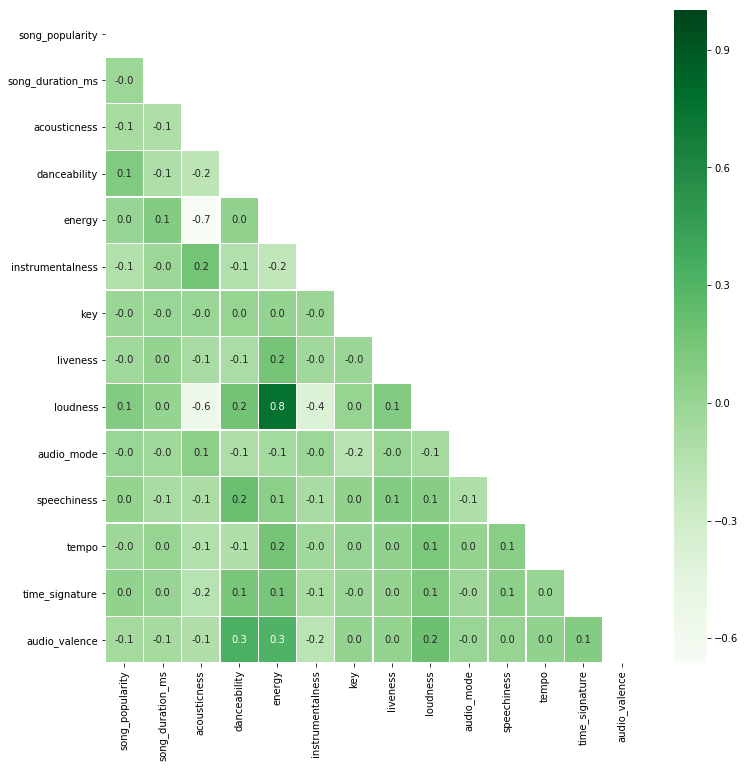

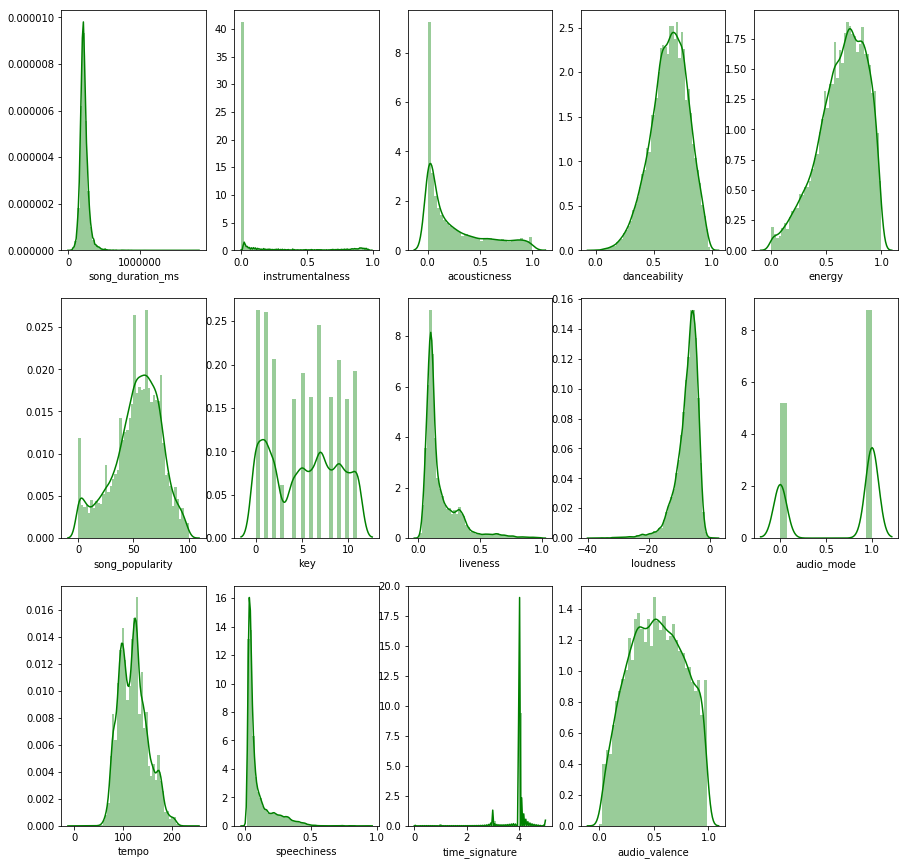

In [6]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Greens",mask=mask)
plt.show() 

f, axes = plt.subplots(3, 5, figsize=(15, 15))
sns.distplot( df["song_duration_ms"] , color="green", ax=axes[0, 0])
sns.distplot( df["instrumentalness"] , color="green", ax=axes[0, 1])
sns.distplot( df["acousticness"] , color="green", ax=axes[0, 2])
sns.distplot( df["danceability"] , color="green", ax=axes[0, 3])
sns.distplot( df["energy"] , color="green", ax=axes[0, 4])
sns.distplot( df["song_popularity"] , color="green", ax=axes[1, 0])
sns.distplot( df["key"] , color="green", ax=axes[1, 1])
sns.distplot( df["liveness"] , color="green", ax=axes[1, 2])
sns.distplot( df["loudness"] , color="green", ax=axes[1, 3])
sns.distplot( df["audio_mode"] , color="green", ax=axes[1, 4])
sns.distplot( df["tempo"] , color="green", ax=axes[2, 0])
sns.distplot( df["speechiness"] , color="green", ax=axes[2, 1])
sns.distplot( df["time_signature"] , color="green", ax=axes[2, 2])
sns.distplot( df["audio_valence"] , color="green", ax=axes[2, 3])
f.delaxes(axes[2][4])


plt.show()

# Perform necessary transformation to predictor variables

In [7]:
bins = [-40, -30, -20, -10, 0]
names = [1, 2, 3, 4]

df['loudness'] = pd.cut(df['loudness'], bins, labels=names)

# Select outcome variable; transform outcome variable

In [8]:
#We want our outcome variable to be categorical, so song popularity will be broken into 5 tiers
df = df.dropna()

df['song_popularity'] = (df['song_popularity'].astype(int))

bins = [0, 20, 40, 60, 80, 100]
names = [1, 2, 3, 4, 5]

df['popularity'] = pd.cut(df['song_popularity'], bins, labels=names)

df = df.dropna()

X = df.drop('popularity', 1)
X = X.drop('song_name', 1)
X = X.drop('song_popularity', 1)
Y = df.popularity
Y = Y.astype(int)



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Convert train split to numpy arrays
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)


# Select model

In [9]:
import itertools    

def make_param_grids(steps, param_grids):

    final_params=[]
    # (pca OR svd) AND (svm OR rf) will become ->
    # (pca, svm) , (pca, rf) , (svd, svm) , (svd, rf)
    for estimator_names in itertools.product(*steps.values()):
        current_grid = {}

        # Step_name and estimator_name should correspond
        # i.e preprocessor must be from pca and select.
        for step_name, estimator_name in zip(steps.keys(), estimator_names):
            for param, value in param_grids.get(estimator_name).items():
                if param == 'object':
                    # Set actual estimator in pipeline
                    current_grid[step_name]=[value]
                else:
                    # Set parameters corresponding to above estimator
                    current_grid[step_name+'__'+param]=value
        #Append this dictionary to final params            
        final_params.append(current_grid)

    return final_params

In [10]:
pipeline_steps = {'classifier':['svc', 'log', 'knn', 'percep', 'mlp','rf']}

# fill parameters to be searched in this dict
all_param_grids = {'svc':{'object':LinearSVC(), 
                          'penalty':['l2']
                         }, 
                   
                   'knn':{'object':KNeighborsClassifier()
                         }, 
                   
                   'percep':{'object':Perceptron(), 
                          'penalty':['l1','l2']
                         }, 

                   'log':{'object':LogisticRegression(),
                         'penalty':['l1','l2'],
                         'solver':['saga'],
                         'multi_class':['ovr', 'multinomial'] 
                         },
                   'mlp':{'object':MLPClassifier(),
                          'hidden_layer_sizes': [(500, ),(200,200),(100, )],
                          'activation': ['relu','logistic','tanh'],
                          'max_iter': [200, 300]
                         },
                   'rf': {'object': RandomForestClassifier(),
                          'n_estimators': [100,200],
                         }
                   
                  }  

# Try more models (non-linear ones): basic neural nets, SVC

# Call the method on the above declared variables
param_grids_list = make_param_grids(pipeline_steps, all_param_grids)

# The PCA() and SVC() used here are just to initialize the pipeline,
# actual estimators will be used from our `param_grids_list`
pipe = Pipeline(steps=[('classifier', LinearSVC())]) 

In [11]:
grd = GridSearchCV(pipe, param_grid = param_grids_list)
grd.fit(X_train,Y_train)
grd.best_estimator_

#pd.DataFrame(grd.cv_results_)
#grd.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaco

Pipeline(memory=None,
     steps=[('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

# Test strength of selected models

In [12]:
#KNN Model
neigh = KNeighborsClassifier(n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
neigh.fit(X_train, Y_train)

y_pred = neigh.predict(X_test)
y_true= Y_test

print("Accuracy of model is {0:.4f}".format(accuracy_score(y_true, y_pred)))
print("Precision of model is {0:.4f}".format(precision_score(y_true, y_pred, average='macro')))
print("Recall of model is {0:.4f}".format(recall_score(y_true, y_pred, average='macro')))
print("F1 score of model is {0: .4f}".format(f1_score(y_true, y_pred, average='macro')))

Accuracy of model is 0.3831
Precision of model is 0.3481
Recall of model is 0.3551
F1 score of model is  0.3497


In [13]:
#Logistic Regression Model
LOG_REG = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='ovr',
           n_jobs=None, penalty='l1', random_state=None, solver='saga',
           tol=0.0001, verbose=0, warm_start=False)

LOG_REG.fit(X_train, Y_train)

y_pred = LOG_REG.predict(X_test)
y_true= Y_test

print("Accuracy of model is {0:.4f}".format(accuracy_score(y_true, y_pred)))
print("Precision of model is {0:.4f}".format(precision_score(y_true, y_pred, average='macro')))
print("Recall of model is {0:.4f}".format(recall_score(y_true, y_pred, average='macro')))
print("F1 score of model is {0: .4f}".format(f1_score(y_true, y_pred, average='macro')))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of model is 0.3447
Precision of model is 0.0689
Recall of model is 0.2000
F1 score of model is  0.1025


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
# Random Forest

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
y_true= Y_test

print("Accuracy of model is {0:.4f}".format(accuracy_score(y_true, y_pred)))
print("Precision of model is {0:.4f}".format(precision_score(y_true, y_pred, average='macro')))
print("Recall of model is {0:.4f}".format(recall_score(y_true, y_pred, average='macro')))
print("F1 score of model is {0: .4f}".format(f1_score(y_true, y_pred, average='macro')))

Accuracy of model is 0.5740
Precision of model is 0.6620
Recall of model is 0.5101
F1 score of model is  0.5228


In [15]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [27]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test[1].reshape(1,-1))
str(result[0])

'3'

# Build Flask Api